In [2]:
import numpy as np
import pandas as pd

### point data load(=ldps grid + obs point)

In [3]:
import numpy as np
import netCDF4 as nc
import glob

# nwp grid, stn(bias corrected) load, here example use obs data instead of bias corrected nwp
# nwp grid
#input_dir = "/Users/mankikim/JOB/DATA/"
#input_dir = "/Users/mankikim/Desktop/DATA_LINK/"
input_dir = r"D:/KMK_DATA/NWP/"
#files = glob.glob(input_dir + "*.nc")
files = glob.glob(input_dir + "l015_v070_erlo_unis_20kind.2023041000.nc")
print(files)
nc_file = nc.Dataset(files[-1])
print(nc_file)
# 
nwp_grd_t = np.array(nc.Dataset(files[-1]).variables['TMP_1_5maboveground'])[0,:,:] - 273.15
print("nwp_t: ", nwp_grd_t.shape)
print(nwp_grd_t.min(), nwp_grd_t.max())


nwp_lat = np.load("../fcst_wind/DAIO/nwp/ldaps_lat_grid")
nwp_lon = np.load("../fcst_wind/DAIO/nwp/ldaps_lon_grid")
print("lat shape: ", nwp_lat.shape)
print("lon shape: ", nwp_lon.shape)
print(nwp_lat[0,0], nwp_lat[-1,-1])
print(nwp_lon[0,0], nwp_lon[-1,-1])



# check diff --> 4째자리부터 차이 있음
dif_lon = []
dif_lat = []
#for i in range(nwp_lon.shape[0]):
#    for j in range(nwp_lon.shape[1]-1):
for i in range(100):
  for j in range(100):
      dif_lon.append( np.round(nwp_lon[i,j+1] - nwp_lon[i,j], 5))
      dif_lat.append( np.round(nwp_lat[i+1,j] - nwp_lat[i,j], 5))
dlon = np.array(set(dif_lon))
dlat = np.array(set(dif_lat))
print("dif lon: ", dlon)
print("dif lat: ", dlat)


# # LDAPS 9999값 확인 필요 
#index = set(np.where(nwp_grd_t > 999.)[0])
#print(sorted(index))





['D:/KMK_DATA/NWP/l015_v070_erlo_unis_20kind.2023041000.nc']
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.0
    History: Mon Apr 10 15:36:01 2023: ncrcat ./l015_v070_erlo_unis_h000.2023041000.nc ./l015_v070_erlo_unis_h001.2023041000.nc ./l015_v070_erlo_unis_h002.2023041000.nc ./l015_v070_erlo_unis_h003.2023041000.nc ./l015_v070_erlo_unis_h004.2023041000.nc ./l015_v070_erlo_unis_h005.2023041000.nc ./l015_v070_erlo_unis_h006.2023041000.nc ./l015_v070_erlo_unis_h007.2023041000.nc ./l015_v070_erlo_unis_h008.2023041000.nc ./l015_v070_erlo_unis_h009.2023041000.nc ./l015_v070_erlo_unis_h010.2023041000.nc ./l015_v070_erlo_unis_h011.2023041000.nc ./l015_v070_erlo_unis_h012.2023041000.nc ./l015_v070_erlo_unis_h013.2023041000.nc ./l015_v070_erlo_unis_h014.2023041000.nc ./l015_v070_erlo_unis_h015.2023041000.nc ./l015_v070_erlo_unis_h016.2023041000.nc ./l015_v070_erlo_unis_h017.2023041000.nc ./l015_v070_erlo_unis_h018.2023041000.nc ./l0

In [4]:
# obs stn for 불규칙 데이터
stn_latlon = {"47105": [37.7515, 128.891]}
obs_lat = stn_latlon['47105'][0]
obs_lon = stn_latlon['47105'][1]
obs_stnd = np.load("../fcst_wind/DAIO/obs_data_47105")
print(obs_stnd.shape)


# select U & V
#if sel_v == 'u':
#    nwp_grid[:,:,0]

(868, 49, 2)


#### 영역분리

In [5]:
# # 37~39, 127~129
print(nwp_lat.shape)
print(nwp_lon.shape)

lat_mask = (nwp_lat >= 37.0) & (nwp_lat <= 39.0)
lon_mask = (nwp_lon >= 127.0) & (nwp_lon <= 129.0)
ll_mask = lat_mask & lon_mask
#mask = ( (a<1) & (b<2) )
print(lat_mask)
print(lon_mask)
print(ll_mask)

ll_mask_idx = np.where(ll_mask==True)
print(ll_mask_idx[0])
print(ll_mask_idx[1])
y_idx = list(set(ll_mask_idx[0]))
x_idx = list(set(ll_mask_idx[1]))
sub_nwp_lat = nwp_lat[y_idx[0]:y_idx[-1]+1,x_idx[0]:x_idx[-1]+1]
sub_nwp_lon = nwp_lon[y_idx[0]:y_idx[-1]+1,x_idx[0]:x_idx[-1]+1]
sub_nwp_grd_t = nwp_grd_t[y_idx[0]:y_idx[-1]+1,x_idx[0]:x_idx[-1]+1]
print(sub_nwp_lat.shape)
print(sub_nwp_lon.shape)
print(sub_nwp_grd_t.shape)

print(sub_nwp_grd_t.min(), sub_nwp_grd_t.max())
print(sub_nwp_lat.min(), sub_nwp_lat.max())
print(sub_nwp_lon.min(), sub_nwp_lon.max())

# # .. test
# a = np.array([[2,2,2,2],
#               [2,0,1,2],
#               [2,1,0,2],
#               [2,2,2,2]])

# b = np.array([[2,2,2,2],
#               [2,1,0,2],
#               [2,0,1,2],
#               [2,2,2,2]])

# a_mask = (a < 2) & (a >=0)
# b_mask = (b < 2) & (b >=0)
# c_mask = a_mask & b_mask
# #mask = ( (a<1) & (b<2) )
# print(a_mask)
# print(b_mask)
# print(c_mask)
# print(type(c_mask))
# c_mask_idx = np.where(c_mask==True)
# print(c_mask_idx[0])
# print(c_mask_idx[1])
# y_idx = list(set(c_mask_idx[0]))
# x_idx = list(set(c_mask_idx[1]))
# c = a[y_idx[0]:y_idx[-1]+1,x_idx[0]:x_idx[-1]+1]
# print(c.shape)
# print(c)



(781, 602)
(781, 602)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[340 340 340 ... 486 486 486]
[317 318 319 ... 424 425 426]
(147, 117)
(147, 117)
(147, 117)
1.2565308 18.722351
36.970163730580865 39.03152178341463
126.97497790415062 129.0779151314157

### 불규칙데이터 생성

In [6]:
# 인풋 shape 만들기
flatten_input = []
for i in range(sub_nwp_lat.shape[0]): # lat
    for j in range(sub_nwp_lat.shape[1]): # lon
        flatten_input.append([ sub_nwp_lon[i,j], sub_nwp_lat[i,j], sub_nwp_grd_t[i,j] ])
flatten_input.append([obs_lon, obs_lat, obs_stnd[10,0,0]])


# asarray(copy=False)
print("ldps points: ",len(flatten_input))
input_data = np.asarray(flatten_input)
print(input_data[0:5])

# extract attribute 
lon_lat_data = input_data[:, 0:2]
qff_values = input_data[:, 2]

print(lon_lat_data.shape)
print(qff_values.shape)
print(np.min(lon_lat_data[:,0]), ',', np.min(lon_lat_data[:,1]))
print(np.max(lon_lat_data[:,0]), ',', np.max(lon_lat_data[:,1]))
#print(qff_values[0])
print(np.min(qff_values), np.max(qff_values))




ldps points:  17200
[[126.9749779   37.00975225   9.31365967]
 [126.99227913  37.00958252   9.47918701]
 [127.00958026  37.00940981   9.61541748]
 [127.02688129  37.00923411   9.61639404]
 [127.04418223  37.00905543   9.59979248]]
(17200, 2)
(17200,)
126.97497790415062 , 36.970163730580865
129.0779151314157 , 39.03152178341463
1.25653076171875 18.72235107421875


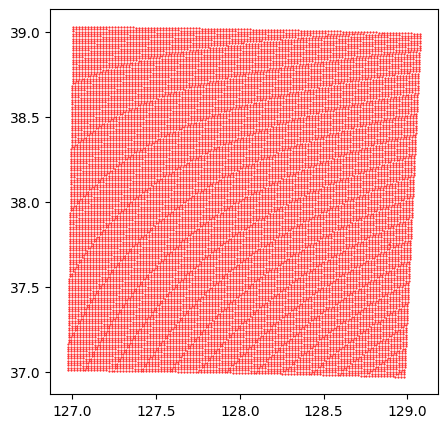

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

gridX = np.arange(127, 129, 1)
gridY = np.arange(37, 39, 1)
levels = np.arange(0, 20, 0.1)
#cs = plt.contour(lon_lat_data[:][1], lon_lat_data[:][0], qff_values, levels)
#plt.clabel(cs, levels[::2], fmt='%d', fontsize=9)

plt.scatter(lon_lat_data[:, 0], lon_lat_data[:, 1], color='red', s=1, marker='.')

plt.show()

In [8]:
#!C:\Users\tjoeun\AppData\Local\Programs\Python\Python39\Scripts\pip install fast-barnes-py

### Objective analysis - barnes

In [9]:
#!pip install fast-barnes-py
# definition of a 12Â° x 12Â° grid starting at 9Â°W / 47Â°N
# resolution = 200.
# step = 1.0 / resolution # 1도안에 넣을개수
# x0 = np.asarray([lon_lat_data[0][0], lon_lat_data[0][1]], dtype=np.float64)
# size = (int(2.0 / step), int(2.0 / step)) # 37~39, 127~129
# Xend1 = x0[0] + (step*size[0])
# Xend2 = x0[1] + (step*size[1])


lon_dist = round(abs(lon_lat_data[:,0].min() - lon_lat_data[:,0].max()))
lat_dist = round(abs(lon_lat_data[:,1].min() - lon_lat_data[:,1].max()))
step = 0.005
x0 = np.asarray([round(lon_lat_data[0,0]), round(lon_lat_data[0,1])], dtype=np.float64)
size = (int(lon_dist / step), int(lat_dist / step))
x_e_lon = x0[0] + (step*size[0])
x_e_lat = x0[1] + (step*size[1])
print("start: ", x0)
print("lon dist: ", lon_dist)
print("lat dist: ", lat_dist)
print("step: ", step)
print("oa dim: ", size)
print("end: ", x_e_lon, x_e_lat)



# calculate Barnes interpolation
from fastbarnes import interpolationS2, interpolation


sigma = 0.01
#field = interpolation.barnes(lon_lat_data, qff_values, sigma, x0, step, size)
field = interpolation.barnes(lon_lat_data, qff_values, sigma, x0, step, size)
print(type(field))
print(np.round(field, 2))
print(np.min(field), np.max(field))
print(field.shape)

#field.shape
#field_1 = np.where( (field<=20.) & (field>=-20.) , field, 0.)

start:  [127.  37.]
lon dist:  2
lat dist:  2
step:  0.005
oa dim:  (400, 400)
end:  129.0 39.0
<class 'numpy.ndarray'>
[[ 9.62  9.62  9.62 ...  5.84  5.8   5.79]
 [ 9.62  9.62  9.63 ...  5.83  5.8   5.78]
 [ 9.63  9.63  9.63 ...  5.81  5.79  5.77]
 ...
 [ 3.25  3.26  3.27 ... 12.66 12.67 12.67]
 [ 3.09  3.1   3.13 ... 12.63 12.64 12.65]
 [ 2.99  3.01  3.05 ... 12.62 12.63 12.63]]
1.967314 18.120829
(400, 400)


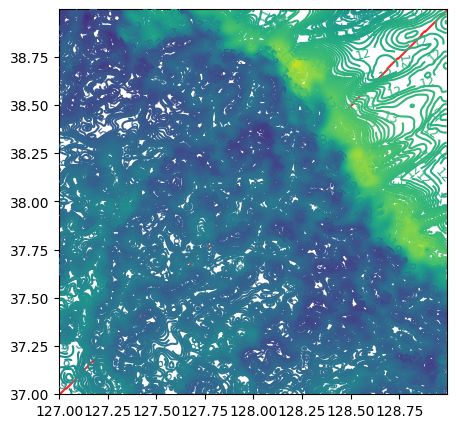

In [13]:
# draw graphic with labeled contours and scattered sample points
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))

gridX = np.arange(x0[0], x0[0]+size[0]*step, step)
gridY = np.arange(x0[1], x0[1]+size[1]*step, step)
#print(gridX, gridY)
levels = np.arange(0, 20, 0.1)
cs = plt.contour(gridX, gridY, field, levels)
plt.clabel(cs, levels, fmt='%d', fontsize=9)

#plt.scatter(gridX, gridY, color='red', s=1, marker='.')

plt.show()